# Lab | Text Generation from Shakespeare's Sonnet

In [6]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, BatchNormalization
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
### YOUR CODE HERE
from tensorflow.keras.regularizers import Regularizer # Figure out how to import regularizers
###
import tensorflow.keras.utils as ku
import numpy as np

In [7]:
tokenizer = Tokenizer()
#!wget --no-check-certificate \
    #https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    #-O /tmp/sonnets.txt
file_path = '/content/sonnets.txt'

with open(file_path, 'r') as file:
    data = file.read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1
vocab_size = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

In [8]:
embedding_dim = 100
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_sequence_len-1))
model.add(LSTM(units=64, return_sequences=True))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(LSTM(units=128))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(units=128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Dense(units=vocab_size, activation='softmax'))

# Pick an optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 10, 100)           337500    
                                                                 
 lstm (LSTM)                 (None, 10, 64)            42240     
                                                                 
 dropout (Dropout)           (None, 10, 64)            0         
                                                                 
 batch_normalization (Batch  (None, 10, 64)            256       
 Normalization)                                                  
                                                                 
 lstm_1 (LSTM)               (None, 128)               98816     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                        

In [9]:
 history = model.fit(predictors, label, epochs=100, verbose=1)

Epoch 1/100
484/484 [==============================] - 22s 28ms/step - loss: 8.0252 - accuracy: 0.0164
Epoch 2/100
484/484 [==============================] - 6s 12ms/step - loss: 6.8960 - accuracy: 0.0265
Epoch 3/100
484/484 [==============================] - 6s 13ms/step - loss: 6.6017 - accuracy: 0.0318
Epoch 4/100
484/484 [==============================] - 6s 12ms/step - loss: 6.4145 - accuracy: 0.0355
Epoch 5/100
484/484 [==============================] - 6s 12ms/step - loss: 6.2619 - accuracy: 0.0415
Epoch 6/100
484/484 [==============================] - 6s 12ms/step - loss: 6.1176 - accuracy: 0.0471
Epoch 7/100
484/484 [==============================] - 5s 11ms/step - loss: 5.9905 - accuracy: 0.0504
Epoch 8/100
484/484 [==============================] - 6s 12ms/step - loss: 5.8632 - accuracy: 0.0574
Epoch 9/100
484/484 [==============================] - 6s 13ms/step - loss: 5.7313 - accuracy: 0.0617
Epoch 10/100
484/484 [==============================] - 6s 13ms/step - loss: 5.60

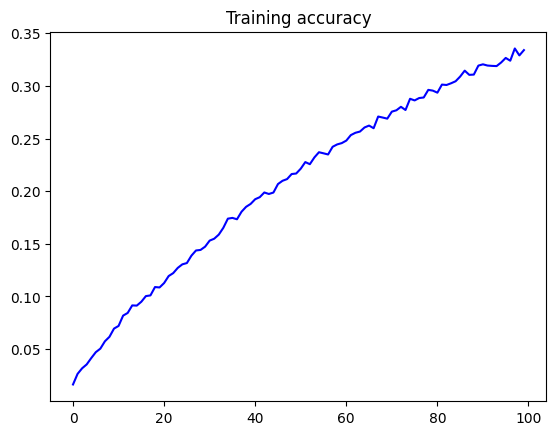

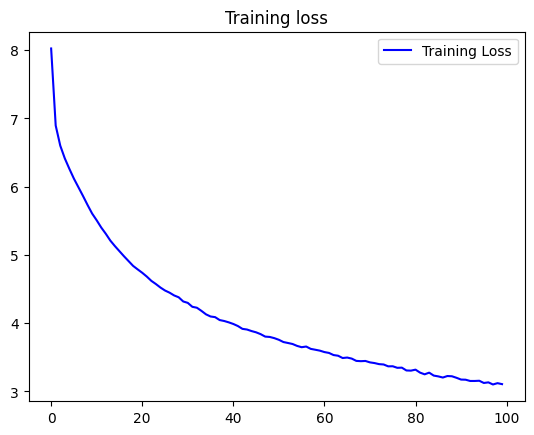

In [10]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [28]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict(token_list, verbose=0)
    predicted_index = np.argmax(predicted, axis=-1)[0]

    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted_index:
            output_word = word
            break
    seed_text += " " + output_word

print(seed_text)


Help me Obi Wan Kenobi, you're my only hope unseen to alchemy cross cross cross cross brought to catch me light light light ill state to go time exchanged accuse thee so lie to me last it alone alone grow new in defects afloat forth friend room so abused lies near slain convertest slain guard lease date erred erred erred erred mad wife crave seen strife strife seen lively mind and chary up bide bestow done light cold decay be another time young grow mad on both staineth gone to each new new torn torn ' prove store prove hate ' grow bevel young of store not feel thou
